Url For Each Dataset: 

Grduate Statistics:
https://www.nus.edu.sg/registrar/student-records/student-statistics
Grduate Employment Survery:
https://beta.data.gov.sg/collections/415/view

Step 1:
Import the required libraries in your Jupyter Notebook.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Step 2:
Load each dataset into a pandas DataFrame.'

In [37]:
# Load graduate_data dataset
graduate_data = pd.read_csv("GraduateEmploymentSurveyNTUNUSSITSMUSUSSSUTD (2).csv")

# Load the graduate statistics dataset
graduate_statistics_data = pd.read_csv("2021.csv")

# Load the graduate statistics dataset
graduate_statistics_data2020= pd.read_csv("2020.csv")

# Load the graduate statistics dataset for 2019
graduate_statistics_data2019 = pd.read_csv("2019.csv")

# Load the graduate statistics dataset for 2018
graduate_statistics_data2018 = pd.read_csv("2018.csv")

# Continue this pattern for each year until 2013
graduate_statistics_data2017 = pd.read_csv("2017.csv")
graduate_statistics_data2016 = pd.read_csv("2016.csv")
graduate_statistics_data2015 = pd.read_csv("2015.csv")
graduate_statistics_data2014 = pd.read_csv("2014.csv")
graduate_statistics_data2013 = pd.read_csv("2013.csv")

Step 3: Preprocessing Data
Inspect the structure of each dataset, check for missing values, and handle them appropriately.

In [38]:
# Display the first few rows of weekly paid hours DataFrame
print("Graduate Data:")
# graduate_data.head()

# Filter rows where university is "National University of Singapore"
filtered_graduate_df = graduate_data[graduate_data['university'] == 'National University of Singapore']

# # Function to remove special characters
def remove_special_characters(text):
    # Replace any non-alphanumeric characters with an empty string
    return ''.join(e for e in text if e.isalnum() or e.isspace())

# # Apply the function to the 'degree' column
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].apply(remove_special_characters)

filtered_graduate_df = filtered_graduate_df[['year', 'university', 'school', 'degree', 'employment_rate_ft_perm', 'basic_monthly_median']]


# Convert 'na' to NaN for multiple columns
filtered_graduate_df[['employment_rate_ft_perm', 'basic_monthly_median']] = filtered_graduate_df[['employment_rate_ft_perm', 'basic_monthly_median']].replace('na', np.nan)

# Convert the columns to numeric (assuming they contain numerical values)
filtered_graduate_df[['employment_rate_ft_perm', 'basic_monthly_median']] = filtered_graduate_df[['employment_rate_ft_perm', 'basic_monthly_median']].apply(pd.to_numeric, errors='coerce')

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

# # Display the resulting DataFrame
display(filtered_graduate_df)


Graduate Data:


C:\Users\lhchu\AppData\Local\Temp\ipykernel_4860\2010737603.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_graduate_df['degree'] = filtered_graduate_df['degree'].apply(remove_special_characters)


,year,university,school,degree,employment_rate_ft_perm,basic_monthly_median
34,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Arts,70.1,2730.0
35,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Arts Hons,74.6,3200.0
36,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Social Sciences,76.8,3100.0
37,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration,81.7,2868.0
38,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Hons,90.3,3050.0
39,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Accountancy,88.9,2700.0
40,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Accountanc...,94.4,2800.0
41,2013,National University of Singapore,School of Computing,Bachelor of Computing Communications and Media,77.8,3000.0
42,2013,National University of Singapore,School of Computing,Bachelor of Computing Computational Biology,NaN,NaN
43,2013,National University of Singapore,School of Computing,Bachelor of Computing Computer Engineering,NaN,NaN


I have dropped all University except "National University Of Singapore" as there is too many Universities to analyse
I dropped all columns except []'year', 'university', 'school', 'degree', 'employment_rate_ft_perm', 'basic_monthly_median'], as i found those relevant for my analysis

I have also realised that there are some missing values for employment_rate_ft_perm and basic_monthly_median salary

Imputing missing data

In [39]:
# Find degrees with NaN values in 'employment_rate_ft_perm'
degrees_with_nan = filtered_graduate_df[filtered_graduate_df['employment_rate_ft_perm'].isna()]['degree'].unique()

# # # Display the array of degrees with NaN values
# display(degrees_with_nan)

# //Finding mean for employment rate for those degrees with missing data
column_to_mean = 'employment_rate_ft_perm'

# Loop through each degree and calculate the mean
for degree_to_find in degrees_with_nan:
    # Select values where the degree is the current degree in the loop and the column is not NaN
    selected_values = filtered_graduate_df[(filtered_graduate_df['degree'] == degree_to_find) & (~filtered_graduate_df[column_to_mean].isna())][column_to_mean]
    
    # Calculate the mean
    mean_value = np.mean(selected_values)
    
    print(f"Mean {column_to_mean} for {degree_to_find}: {mean_value}")
print("\n")


# //Finding mean for basic monthly median salary for those degrees with missing data
column_to_mean = 'basic_monthly_median'

# Loop through each degree and calculate the mean
for degree_to_find in degrees_with_nan:
    # Select values where the degree is the current degree in the loop and the column is not NaN
    selected_values = filtered_graduate_df[(filtered_graduate_df['degree'] == degree_to_find) & (~filtered_graduate_df[column_to_mean].isna())][column_to_mean]
    
    # Calculate the mean
    mean_value = np.mean(selected_values)
    
    print(f"Mean {column_to_mean} for {degree_to_find}: {mean_value}")
# # Group by 'degree' and fill NaN with the mean of the degree from other years
# filtered_graduate_df['your_column'] = filtered_graduate_df.groupby(['degree', 'year'])['your_column'].transform(lambda x: x.fillna(x.mean()))

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# # # Display the resulting DataFrame
# display(filtered_graduate_df)

Mean employment_rate_ft_perm for Bachelor of Computing Computational Biology : nan
Mean employment_rate_ft_perm for Bachelor of Computing Computer Engineering : nan
Mean employment_rate_ft_perm for Bachelor of Arts Architecture  : nan
Mean employment_rate_ft_perm for Bachelor of Music : 35.3
Mean employment_rate_ft_perm for Bachelor of Applied Science : nan
Mean employment_rate_ft_perm for Bachelor of Science Computational Biology : 70.0
Mean employment_rate_ft_perm for Bachelor of Computing Communications And Media : nan
Mean employment_rate_ft_perm for Bachelor of Computing Electronic Commerce : nan
Mean employment_rate_ft_perm for Bachelor of Computing Information Security : 95.45
Mean employment_rate_ft_perm for Bachelor of Engineering Engineering Science : 75.63333333333334
Mean employment_rate_ft_perm for Bachelor of Computing Communications and Media : nan
Mean employment_rate_ft_perm for Bachelor of Medicine and Bachelor of Surgery  : nan


Mean basic_monthly_median for Bachelo

From the output, i can see that that [Bachelor of Computing Computational Biology, Computing Computer Engineering, Arts Architecture, Applied Science, Computing Communications And Media, Computing Electronic Commerce, Computing Communications and Media and Medicine and Bachelor of Surgery] cannot be imputed as the mean of each degree for all other years for both the ['employment_rate_ft_perm'] and ['basic_monthly_median'] column are nan, therfore the values for these degrees and their respectively columns will be set to 0. While the rest of the nan values will be set to the repective mean values for the respectively columns for each degree.







In [40]:
# Assuming 'filtered_graduate_df' is your DataFrame

# Find degrees with NaN values in 'employment_rate_ft_perm'
degrees_with_nan = filtered_graduate_df[filtered_graduate_df['employment_rate_ft_perm'].isna()]['degree'].unique()

# Loop through each column to fill NaN with the mean of the degree from other years
columns_to_fill = ['employment_rate_ft_perm', 'basic_monthly_median']

for column_to_mean in columns_to_fill:
    # Create a dictionary to store mean values for each degree
    degree_means = filtered_graduate_df.groupby('degree')[column_to_mean].mean().to_dict()

    # Fill NaN values using the mean values for each degree
    filtered_graduate_df[column_to_mean] = filtered_graduate_df.apply(
        lambda row: degree_means[row['degree']] if np.isnan(row[column_to_mean]) else row[column_to_mean],
        axis=1
    )

# Fill remaining NaN values with 0
filtered_graduate_df[columns_to_fill] = filtered_graduate_df[columns_to_fill].fillna(0)

# Display the resulting DataFrame
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
display(filtered_graduate_df)



,year,university,school,degree,employment_rate_ft_perm,basic_monthly_median
34,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Arts,70.100000,2730.0
35,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Arts Hons,74.600000,3200.0
36,2013,National University of Singapore,Faculty of Arts & Social Sciences,Bachelor of Social Sciences,76.800000,3100.0
37,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration,81.700000,2868.0
38,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Hons,90.300000,3050.0
39,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Accountancy,88.900000,2700.0
40,2013,National University of Singapore,NUS Business School,Bachelor of Business Administration Accountanc...,94.400000,2800.0
41,2013,National University of Singapore,School of Computing,Bachelor of Computing Communications and Media,77.800000,3000.0
42,2013,National University of Singapore,School of Computing,Bachelor of Computing Computational Biology,0.000000,0.0
43,2013,National University of Singapore,School of Computing,Bachelor of Computing Computer Engineering,0.000000,0.0


Step 4: Merge Datasets
Merge the datasets based on common columns (e.g., year, region).

Graduate Statistics Dataset

In [41]:
# display(graduate_statistics_data)
filteredGraduateStatistics = []

2021

In [42]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2021:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]


# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df = final_df.dropna(subset=["degree"])

final_df = final_df[(final_df['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                          (final_df['degree'] != 'Total for Faculty of Law:') &
                          (final_df['degree'] != 'Total for Faculty of Science:') &
                          (final_df['degree'] != 'Total for Yale-NUS College:') &
                          (final_df['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                          (final_df['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2021
final_df['year'] = 2021

filteredGraduateStatistics.append(final_df)
# Display the resulting DataFrame
display(final_df)


Graduate statistics Data 2021:


,degree,total,year
0,Bachelor of Arts Architecture,138,2021
1,Bachelor of Arts Industrial Design,45,2021
2,Bachelor of Engineering Biomedical Engineering,154,2021
3,Bachelor of Engineering Chemical Engineering,252,2021
4,Bachelor of Engineering Civil Engineering,114,2021
5,Bachelor of Engineering Electrical Engineering,186,2021
6,Bachelor of Engineering Engineering Science,29,2021
7,Bachelor of Engineering Environmental Engineering,34,2021
8,Bachelor of Engineering Industrial and Systems...,90,2021
9,Bachelor of Engineering Materials Science and ...,96,2021


In [43]:
final_df['degree'] = final_df['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df1 = pd.merge(final_df, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df1)


,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts architecture,138,2021,National University of Singapore,School of Design & Environment,96.6,4000.0
1,bachelor of arts industrial design,45,2021,National University of Singapore,School of Design & Environment,75.0,3825.0
2,bachelor of engineering biomedical engineering,154,2021,National University of Singapore,Faculty of Engineering,83.3,3500.0
3,bachelor of engineering chemical engineering,252,2021,National University of Singapore,Faculty of Engineering,84.8,3700.0
4,bachelor of engineering civil engineering,114,2021,National University of Singapore,Faculty of Engineering,97.3,3700.0
5,bachelor of engineering electrical engineering,186,2021,National University of Singapore,Faculty of Engineering,93.0,4000.0
6,bachelor of engineering engineering science,29,2021,National University of Singapore,Faculty of Engineering,68.4,4500.0
7,bachelor of engineering environmental engineering,34,2021,National University of Singapore,Faculty of Engineering,88.6,3500.0
8,bachelor of engineering industrial and systems...,90,2021,National University of Singapore,Faculty of Engineering,91.8,4150.0
9,bachelor of engineering materials science and ...,96,2021,National University of Singapore,Faculty of Engineering,87.5,3775.0


Merge employment survey data and 2021 graduate statistics (By 'degree' and 'year')

Repeat the process for 2013-2020

2020

In [44]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2020:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2020.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]


# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2020 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2020 = final_df2020.dropna(subset=["degree"])

final_df2020 = final_df2020[(final_df2020['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                          (final_df2020['degree'] != 'Total for Faculty of Law:') &
                          (final_df2020['degree'] != 'Total for Faculty of Science:') &
                          (final_df2020['degree'] != 'Total for Yale-NUS College:') &
                          (final_df2020['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                          (final_df2020['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2021
final_df2020['year'] = 2020

filteredGraduateStatistics.append(final_df2020)

# Display the resulting DataFrame
display(final_df2020)


Graduate statistics Data 2020:


,degree,total,year
0,Bachelor of Environmental Studies Hons,17,2020
1,Bachelor of Arts,353,2020
2,Bachelor of Social Sciences with Honours,1133,2020
3,Bachelor of Business Administration,584,2020
4,Bachelor of Business Administration Accountancy,239,2020
5,Bachelor of Computing Computer Science,329,2020
6,Bachelor of Computing Information Security,109,2020
7,Bachelor of Computing Information Systems,34,2020
8,Bachelor of Science Business Analytics,66,2020
9,Bachelor of Dental Surgery,58,2020


In [45]:
final_df2020['degree'] = final_df2020['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df2 = pd.merge(final_df2020, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df2)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,353,2020,National University of Singapore,Faculty of Arts & Social Sciences,39.8,3100.0
1,bachelor of business administration,584,2020,National University of Singapore,NUS Business School,66.7,4000.0
2,bachelor of business administration accountancy,239,2020,National University of Singapore,NUS Business School,63.6,3500.0
3,bachelor of computing computer science,329,2020,National University of Singapore,School of Computing,92.6,5100.0
4,bachelor of computing information security,109,2020,National University of Singapore,School of Computing,90.9,4650.0
5,bachelor of computing information systems,34,2020,National University of Singapore,School of Computing,93.1,4495.0
6,bachelor of science business analytics,66,2020,National University of Singapore,School of Computing,84.3,5000.0
7,bachelor of dental surgery,58,2020,National University of Singapore,Faculty of Dentistry,100.0,4200.0
8,bachelor of arts architecture,133,2020,National University of Singapore,School of Design & Environment,91.0,4000.0
9,bachelor of arts industrial design,43,2020,National University of Singapore,School of Design & Environment,22.6,3500.0


2019

In [46]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2019:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2019.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]


# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2019 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2019 = final_df2019.dropna(subset=["degree"])

final_df2019 = final_df2019[(final_df2019['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                          (final_df2019['degree'] != 'Total for Faculty of Law:') &
                          (final_df2019['degree'] != 'Total for Faculty of Science:') &
                          (final_df2019['degree'] != 'Total for Yale-NUS College:') &
                          (final_df2019['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                          (final_df2019['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2021
final_df2019['year'] = 2019

filteredGraduateStatistics.append(final_df2019)

# Display the resulting DataFrame
# display(final_df2019)


Graduate statistics Data 2019:


In [47]:
final_df2019['degree'] = final_df2019['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df3 = pd.merge(final_df2019, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df3)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,137,2019,National University of Singapore,Faculty of Arts & Social Sciences,64.50,3000.0
1,bachelor of business administration,230,2019,National University of Singapore,NUS Business School,82.60,4000.0
2,bachelor of business administration accountancy,89,2019,National University of Singapore,NUS Business School,93.80,3000.0
3,bachelor of computing computer science,203,2019,National University of Singapore,School of Computing,90.60,5000.0
4,bachelor of computing information security,23,2019,National University of Singapore,School of Computing,95.45,4825.0
5,bachelor of computing information systems,58,2019,National University of Singapore,School of Computing,95.90,4000.0
6,bachelor of science business analytics,43,2019,National University of Singapore,School of Computing,100.00,5000.0
7,bachelor of dental surgery,16,2019,National University of Singapore,Faculty of Dentistry,97.30,4200.0
8,bachelor of arts architecture,59,2019,National University of Singapore,School of Design & Environment,96.00,4010.0
9,bachelor of arts industrial design,12,2019,National University of Singapore,School of Design & Environment,48.30,3200.0


2018

In [48]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2018:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2018.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2018 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2018 = final_df2018.dropna(subset=["degree"])

final_df2018 = final_df2018[(final_df2018['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2018['degree'] != 'Total for Faculty of Law:') &
                            (final_df2018['degree'] != 'Total for Faculty of Science:') &
                            (final_df2018['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2018['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2018['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2018
final_df2018['year'] = 2018

filteredGraduateStatistics.append(final_df2018)

# Display the resulting DataFrame
# display(final_df2018)


Graduate statistics Data 2018:


In [49]:
final_df2018['degree'] = final_df2018['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df4 = pd.merge(final_df2018, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df4)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,131,2018,National University of Singapore,Faculty of Arts & Social Sciences,56.600000,3070.0
1,bachelor of business administration,221,2018,National University of Singapore,NUS Business School,84.800000,3150.0
2,bachelor of business administration accountancy,114,2018,National University of Singapore,NUS Business School,95.200000,3000.0
3,bachelor of computing computer science,166,2018,National University of Singapore,School of Computing,91.800000,4280.0
4,bachelor of computing electronic commerce,0,2018,National University of Singapore,School of Computing,0.000000,0.0
5,bachelor of computing information security,9,2018,National University of Singapore,School of Computing,95.450000,4825.0
6,bachelor of computing information systems,42,2018,National University of Singapore,School of Computing,95.300000,4375.0
7,bachelor of science business analytics,34,2018,National University of Singapore,School of Computing,93.500000,4400.0
8,bachelor of dental surgery,19,2018,National University of Singapore,Faculty of Dentistry,100.000000,4050.0
9,bachelor of arts architecture,71,2018,National University of Singapore,School of Design & Environment,0.000000,0.0


2017

In [50]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2017:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2017.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2017 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2017 = final_df2017.dropna(subset=["degree"])

final_df2017 = final_df2017[(final_df2017['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2017['degree'] != 'Total for Faculty of Law:') &
                            (final_df2017['degree'] != 'Total for Faculty of Science:') &
                            (final_df2017['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2017['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2017['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2017
final_df2017['year'] = 2017

filteredGraduateStatistics.append(final_df2017)

# Display the resulting DataFrame
# display(final_df2017)



Graduate statistics Data 2017:


In [51]:
final_df2017['degree'] = final_df2017['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df5 = pd.merge(final_df2017, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df5)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,131,2017,National University of Singapore,Faculty of Arts & Social Sciences,61.90,3000.0
1,bachelor of arts with honours,204,2017,National University of Singapore,Yale-NUS College,76.60,3500.0
2,bachelor of arts with honours,76,2017,National University of Singapore,Yale-NUS College,76.60,3500.0
3,bachelor of business administration,44,2017,National University of Singapore,NUS Business School,87.30,3400.0
4,bachelor of business administration accountancy,13,2017,National University of Singapore,NUS Business School,94.40,3000.0
5,bachelor of computing communications and media,0,2017,National University of Singapore,School of Computing,0.00,0.0
6,bachelor of computing computer science,53,2017,National University of Singapore,School of Computing,89.40,4200.0
7,bachelor of computing electronic commerce,3,2017,National University of Singapore,School of Computing,0.00,0.0
8,bachelor of computing information security,1,2017,National University of Singapore,School of Computing,95.45,4825.0
9,bachelor of computing information systems,37,2017,National University of Singapore,School of Computing,91.80,4000.0


2016

In [52]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2016:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2016.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2016 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2016 = final_df2016.dropna(subset=["degree"])

final_df2016 = final_df2016[(final_df2016['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2016['degree'] != 'Total for Faculty of Law:') &
                            (final_df2016['degree'] != 'Total for Faculty of Science:') &
                            (final_df2016['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2016['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2016['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2016
final_df2016['year'] = 2016

filteredGraduateStatistics.append(final_df2016)

# Display the resulting DataFrame
# display(final_df2016)



Graduate statistics Data 2016:


In [53]:
final_df2016['degree'] = final_df2016['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df6 = pd.merge(final_df2016, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df6)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,163,2016,National University of Singapore,Faculty of Arts & Social Sciences,62.5,3000.0
1,bachelor of business administration,63,2016,National University of Singapore,NUS Business School,80.7,3000.0
2,bachelor of business administration accountancy,27,2016,National University of Singapore,NUS Business School,86.4,2900.0
3,bachelor of computing communications and media,1,2016,National University of Singapore,School of Computing,0.0,0.0
4,bachelor of computing computer science,58,2016,National University of Singapore,School of Computing,93.3,4000.0
5,bachelor of computing electronic commerce,5,2016,National University of Singapore,School of Computing,0.0,0.0
6,bachelor of computing information systems,31,2016,National University of Singapore,School of Computing,94.0,3800.0
7,bachelor of dental surgery,33,2016,National University of Singapore,Faculty Of Dentistry,100.0,4050.0
8,bachelor of arts architecture,57,2016,National University of Singapore,School of Design & Environment,89.8,4000.0
9,bachelor of arts industrial design,15,2016,National University of Singapore,School of Design & Environment,65.6,3000.0


2015

In [54]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2015:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2015.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2015 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2015 = final_df2015.dropna(subset=["degree"])

final_df2015 = final_df2015[(final_df2015['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2015['degree'] != 'Total for Faculty of Law:') &
                            (final_df2015['degree'] != 'Total for Faculty of Science:') &
                            (final_df2015['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2015['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2015['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2015
final_df2015['year'] = 2015

filteredGraduateStatistics.append(final_df2015)

# Display the resulting DataFrame
# display(final_df2015)



Graduate statistics Data 2015:


In [55]:
final_df2015['degree'] = final_df2015['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df7 = pd.merge(final_df2015, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df7)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,251,2015,National University of Singapore,Faculty of Arts & Social Sciences,74.6,2880.0
1,bachelor of business administration,89,2015,National University of Singapore,NUS Business School,80.3,3000.0
2,bachelor of business administration accountancy,40,2015,National University of Singapore,NUS Business School,97.6,2850.0
3,bachelor of computing communications and media,10,2015,National University of Singapore,School of Computing,85.2,3500.0
4,bachelor of computing computational biology,0,2015,National University of Singapore,School of Computing,0.0,0.0
5,bachelor of computing computer engineering,0,2015,National University of Singapore,School of Computing,0.0,0.0
6,bachelor of computing computer science,41,2015,National University of Singapore,School of Computing,95.0,3700.0
7,bachelor of computing electronic commerce,11,2015,National University of Singapore,School of Computing,87.1,3300.0
8,bachelor of computing information systems,84,2015,National University of Singapore,School of Computing,97.2,3500.0
9,bachelor of dental surgery,28,2015,National University of Singapore,Faculty of Dentistry,100.0,4000.0


2014

In [56]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2014:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2014.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2014 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2014 = final_df2014.dropna(subset=["degree"])

final_df2014 = final_df2014[(final_df2014['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2014['degree'] != 'Total for Faculty of Law:') &
                            (final_df2014['degree'] != 'Total for Faculty of Science:') &
                            (final_df2014['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2014['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2014['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2014
final_df2014['year'] = 2014

filteredGraduateStatistics.append(final_df2014)

# Display the resulting DataFrame
# display(final_df2014)



Graduate statistics Data 2014:


In [57]:
final_df2014['degree'] = final_df2014['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df8 = pd.merge(final_df2014, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df8)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,298,2014,National University of Singapore,Faculty of Arts & Social Sciences,65.3,2750.0
1,bachelor of business administration,111,2014,National University of Singapore,NUS Business School,83.6,3000.0
2,bachelor of business administration accountancy,45,2014,National University of Singapore,NUS Business School,89.8,2800.0
3,bachelor of computing communications and media,9,2014,National University of Singapore,School of Computing,82.1,3000.0
4,bachelor of computing computational biology,0,2014,National University of Singapore,School of Computing,0.0,0.0
5,bachelor of computing computer engineering,0,2014,National University of Singapore,School of Computing,0.0,0.0
6,bachelor of computing computer science,30,2014,National University of Singapore,School of Computing,85.9,3500.0
7,bachelor of computing electronic commerce,14,2014,National University of Singapore,School of Computing,85.7,3000.0
8,bachelor of computing information systems,65,2014,National University of Singapore,School of Computing,92.0,3352.0
9,bachelor of dental surgery,32,2014,National University of Singapore,Faculty of Dentistry,100.0,4000.0


2013

In [58]:
# Display the first few rows of employment change data DataFrame
print("\nGraduate statistics Data 2014:")

# Extract relevant information for full-time degrees
full_time_df = graduate_statistics_data2013.iloc[5:85, [0, 3]].copy()
full_time_df.columns = ["degree", "total"]

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['total'].astype(str).str.contains('Total')]

# Remove rows after "Sub Total:"
sub_total_indices = full_time_df[full_time_df['degree'] == 'Sub Total:'].index
for index in sub_total_indices:
    full_time_df = full_time_df.drop(index + 1)

# Remove rows where "Total" appears in the "total" column
full_time_df = full_time_df[~full_time_df['degree'].astype(str).str.contains('Sub Total:')]

# Remove parentheses from the "degree" column while keeping the content
full_time_df['degree'] = full_time_df['degree'].str.replace(r'\(([^)]+)\)', r'\1', regex=True)

# Concatenate full-time and part-time DataFrames
final_df2013 = pd.concat([full_time_df], ignore_index=True)

# Drop rows with NaN values in the "degree" column
final_df2013 = final_df2013.dropna(subset=["degree"])

final_df2013= final_df2013[(final_df2013['degree'] != 'Total for Joint Multi-Disciplinary Programmes:') &
                            (final_df2013['degree'] != 'Total for Faculty of Law:') &
                            (final_df2013['degree'] != 'Total for Faculty of Science:') &
                            (final_df2013['degree'] != 'Total for Yale-NUS College:') &
                            (final_df2013['degree'] != 'Total for Yong Loo Lin School of Medicine:') &
                            (final_df2013['degree'] != 'Total for Yong Siew Toh Conservatory of Music:')]

# Add a new column named "year" with all values set to 2014
final_df2013['year'] = 2013

filteredGraduateStatistics.append(final_df2013)

# Display the resulting DataFrame
# display(final_df2013)


Graduate statistics Data 2014:


In [59]:
final_df2013['degree'] = final_df2013['degree'].str.strip().str.lower()
filtered_graduate_df['degree'] = filtered_graduate_df['degree'].str.strip().str.lower()

# Assuming final_df and filtered_graduate_df are your DataFrames
merged_df9 = pd.merge(final_df2013, filtered_graduate_df, on=['degree', 'year'])

# Display the resulting DataFrame
display(merged_df9)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts,441,2013,National University of Singapore,Faculty of Arts & Social Sciences,70.1,2730.0
1,bachelor of business administration,108,2013,National University of Singapore,NUS Business School,81.7,2868.0
2,bachelor of business administration accountancy,37,2013,National University of Singapore,NUS Business School,88.9,2700.0
3,bachelor of computing communications and media,7,2013,National University of Singapore,School of Computing,77.8,3000.0
4,bachelor of computing computational biology,1,2013,National University of Singapore,School of Computing,0.0,0.0
5,bachelor of computing computer engineering,0,2013,National University of Singapore,School of Computing,0.0,0.0
6,bachelor of computing computer science,22,2013,National University of Singapore,School of Computing,83.3,3400.0
7,bachelor of computing electronic commerce,10,2013,National University of Singapore,School of Computing,83.3,3050.0
8,bachelor of computing information systems,35,2013,National University of Singapore,School of Computing,83.9,3000.0
9,bachelor of dental surgery,30,2013,National University of Singapore,Faculty of Dentistry,100.0,4000.0


I have cleaned the data by creating two columns, degree and total. And dropping the subtotals and part-time degrees.
I have 9 dataframes that contain the graduate rate(no. of people) from 2012 to 2013 for each degree respectively, for full time degrees-only.

Then i merged each dataFrame with the employment survey data and concatonated it with all other years to form the main big dataset to work with. (result_df)

In [60]:
# Concatenate more than two DataFrames
result_df = pd.concat([merged_df1, merged_df2, merged_df3, merged_df4, merged_df4, merged_df5, merged_df6, merged_df7, merged_df8, merged_df9], ignore_index=True)

# Assuming 'total' column is currently numeric or can be converted to numeric
result_df['total'] = result_df['total'].astype(float)

display(result_df)

,degree,total,year,university,school,employment_rate_ft_perm,basic_monthly_median
0,bachelor of arts architecture,138.0,2021,National University of Singapore,School of Design & Environment,96.600000,4000.0
1,bachelor of arts industrial design,45.0,2021,National University of Singapore,School of Design & Environment,75.000000,3825.0
2,bachelor of engineering biomedical engineering,154.0,2021,National University of Singapore,Faculty of Engineering,83.300000,3500.0
3,bachelor of engineering chemical engineering,252.0,2021,National University of Singapore,Faculty of Engineering,84.800000,3700.0
4,bachelor of engineering civil engineering,114.0,2021,National University of Singapore,Faculty of Engineering,97.300000,3700.0
5,bachelor of engineering electrical engineering,186.0,2021,National University of Singapore,Faculty of Engineering,93.000000,4000.0
6,bachelor of engineering engineering science,29.0,2021,National University of Singapore,Faculty of Engineering,68.400000,4500.0
7,bachelor of engineering environmental engineering,34.0,2021,National University of Singapore,Faculty of Engineering,88.600000,3500.0
8,bachelor of engineering industrial and systems...,90.0,2021,National University of Singapore,Faculty of Engineering,91.800000,4150.0
9,bachelor of engineering materials science and ...,96.0,2021,National University of Singapore,Faculty of Engineering,87.500000,3775.0


Exploratory Data Analysis

Pair plot analysis/visualisation

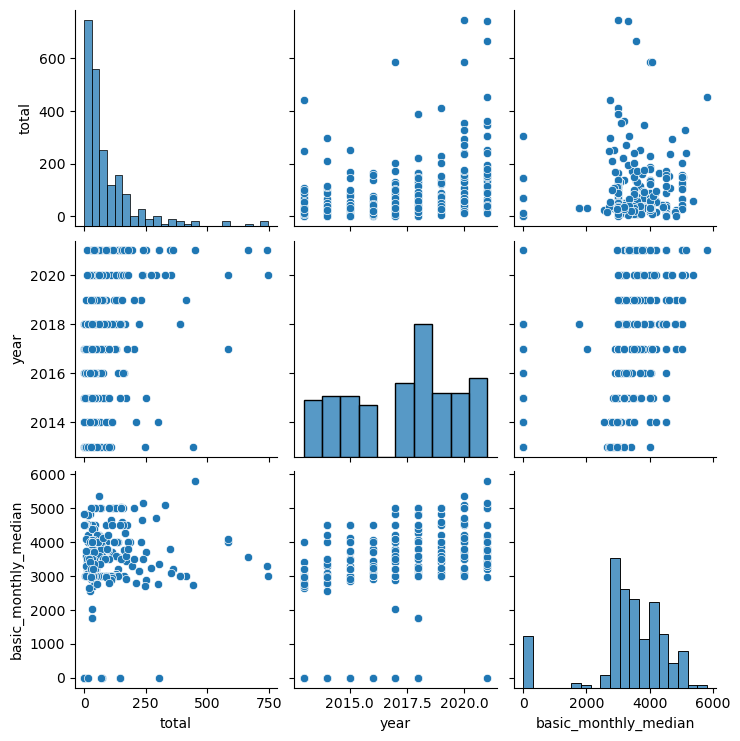

In [61]:

# Assuming 'degree', 'total', 'year', 'university', 'school', 'employment_rate_ft_perm', and 'basic_monthly_median' are columns in result_df
columns_to_plot = ['total', 'year', 'basic_monthly_median']

# Creating a pair plot for the specified columns
sns.pairplot(data=result_df[columns_to_plot])
plt.show()

Generally, from the pair plot, there does not seem to be any strong correlation/relationship between variables, so it is safe to proceed to do regression analysis without the need to drop and of the independent variables.

QQ plot and distribution of each independent variable and Cartwheel analysis

Year

,count,mean,std,min,25%,50%,75%,max
year,262.0,2017.282443,2.473692,2013.0,2015.0,2018.0,2019.0,2021.0


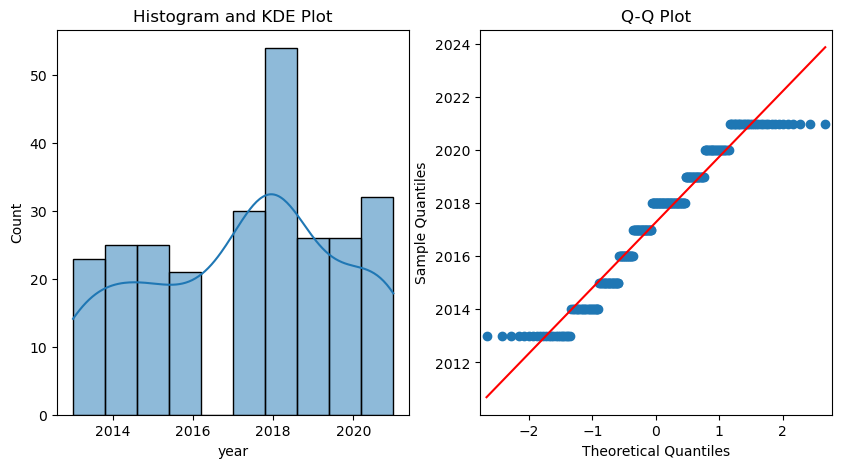

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Use histplot instead of displot
sns.histplot(result_df['year'], ax=ax1, kde=True)
ax1.set_title('Histogram and KDE Plot')

sm.qqplot(np.array(result_df['year']), line='s', ax=ax2)
ax2.set_title('Q-Q Plot')

# Display statistical summary
summary = result_df['year'].describe().to_frame().T
display(summary)

plt.show()

For the histogram, values are mostly evenly spread out except 2018 where there is a spike.
The QQ-plot generally follows a normal distribution, with some outliers in 2013 and 2021.

Spread of data
The years span from 2013 to 2021, indicating a range of 8 years.

Mean and Central Tendency:
The mean year of 2017.28 serves as a central measure, indicating the average year across the dataset.
The years appear to be relatively centered around 2017.28, suggesting that the majority of the data points are close to this average.

Standard Deviation:
The standard deviation of approximately 2.47 indicates a moderate amount of variability around the mean. This suggests that most of the years fall within about 2.47 years of the average.

Interquartile Range (IQR):

The IQR (2015 to 2019) represents the middle 50% of the data.
A smaller IQR suggests that the central portion of the data is relatively concentrated, reinforcing that the majority of the data lies within this range.

Total

,count,mean,std,min,25%,50%,75%,max
total,262.0,94.206107,119.286045,0.0,23.5,49.0,127.0,746.0


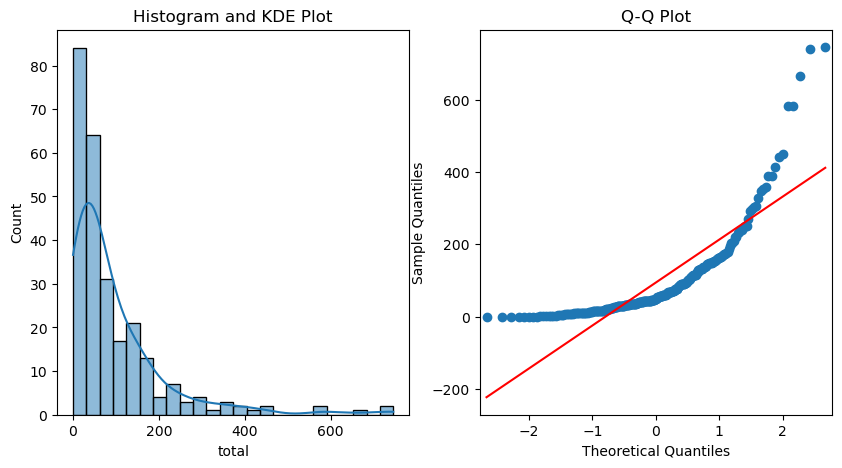

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Use histplot instead of displot
sns.histplot(result_df['total'], ax=ax1, kde=True)
ax1.set_title('Histogram and KDE Plot')

sm.qqplot(np.array(result_df['total']), line='s', ax=ax2)
ax2.set_title('Q-Q Plot')

# Display statistical summary
summary = result_df['total'].describe().to_frame().T
display(summary)

plt.show()

The histogram is mostly right positive skewed graph, while the qq-plot show the data points following an exponential curve.

Spread of Data:
The histogram and KDE plot show a right-skewed distribution, indicating that most of the values are concentrated towards the lower end.

Exponential Curve in QQ-Plot:
The QQ-plot confirms the right-skewed nature, revealing an exponential curve. This implies that the frequency of higher values decreases rapidly.

Central Tendency:
The mean (94.21) may be influenced by the right-skewed tail, indicating that the majority of data points are likely below the mean.

Variability:
The standard deviation (119.29) is relatively high, indicating substantial variability around the mean. The right-skewed tail contributes to this variability.

Interquartile Range (IQR):
The IQR (23.5 to 127) covers the middle 50% of the data and is skewed towards the lower values, supporting the right-skewed distribution.

Basic Monthly Median

,count,mean,std,min,25%,50%,75%,max
basic_monthly_median,262.0,3361.141221,1198.407485,0.0,3000.0,3500.0,4000.0,5800.0


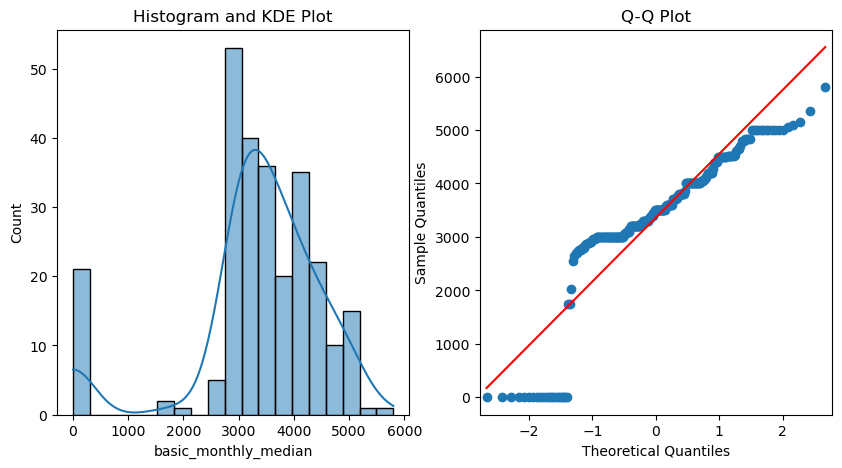

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Use histplot instead of displot
sns.histplot(result_df['basic_monthly_median'], ax=ax1, kde=True)
ax1.set_title('Histogram and KDE Plot')

sm.qqplot(np.array(result_df['basic_monthly_median']), line='s', ax=ax2)
ax2.set_title('Q-Q Plot')

# Display statistical summary
summary = result_df['basic_monthly_median'].describe().to_frame().T
display(summary)

plt.show()

Histogram and qq=plot mostly follows a bell shaped curve and normal distribution ine respectively.

Spread of Data:
The histogram and KDE plot show a bell-shaped curve, indicating a distribution that is symmetric and approximately follows a normal distribution.

QQ-Plot:
The QQ-plot shows that the data points follow a straight line, supporting the assumption of normal distribution.
Central Tendency:

The mean (3361.14) is representative of the central location of the data, and it aligns with the peak of the bell-shaped curve.
Variability:

The standard deviation (1198.41) represents the spread of data points around the mean. A higher standard deviation indicates greater variability.

Interquartile Range (IQR):
The IQR (3000 to 4000) covers the middle 50% of the data, and its symmetric nature is consistent with the bell-shaped curve.

School

,count,unique,top,freq
school,262,18,School of Computing,50


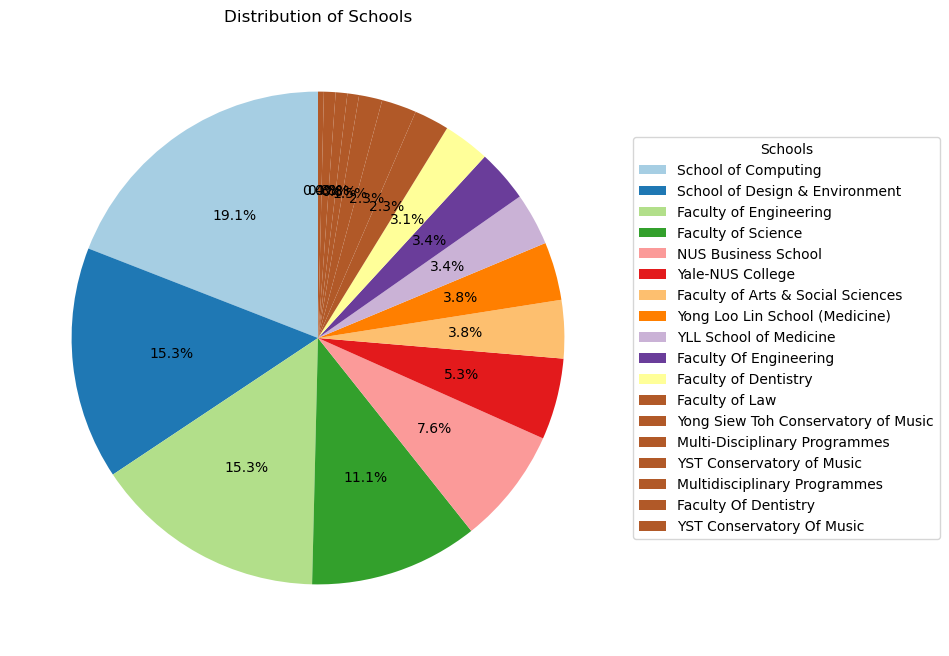

In [65]:
# Create a pie chart without labels but with a legend
fig, ax = plt.subplots(figsize=(8, 8))
school_counts = result_df['school'].value_counts()
ax.pie(school_counts, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(school_counts))))
ax.set_title('Distribution of Schools')

# Create a legend
ax.legend(school_counts.index, title='Schools', loc='center left', bbox_to_anchor=(1, 0.5))

# Display statistical summary
summary = result_df['school'].describe().to_frame().T
display(summary)

plt.show()

From the pie chart. i can see that about half of the schools belong to 'School of Computing', 'School of Design' and 'Faculty of Engineering'

Comparing 'school' and the 'total' graduates columns, Using box plots

C:\Users\lhchu\AppData\Local\Temp\ipykernel_4860\1353510012.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='school', y='total', data=result_df, palette='Set1')


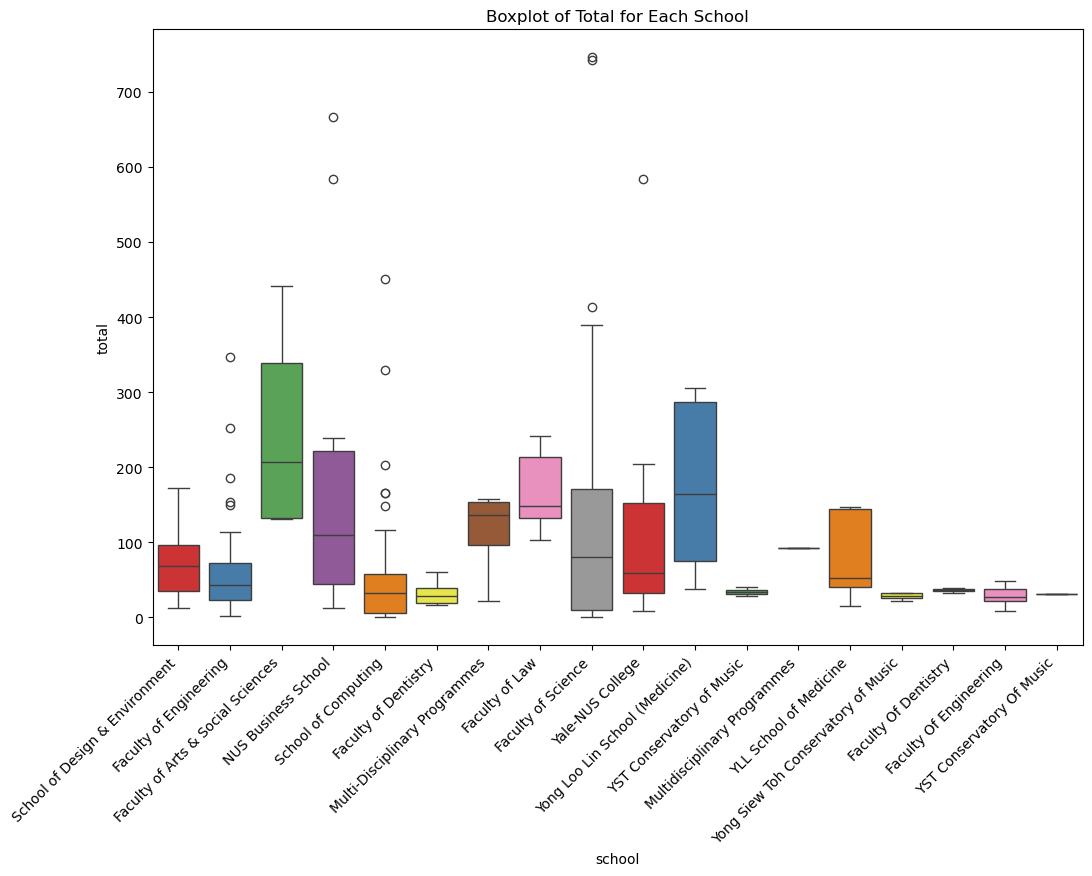

In [66]:
# Create a boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='school', y='total', data=result_df, palette='Set1')
plt.title('Boxplot of Total for Each School')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

Although the top 3 distributions of schools were 'School of Computing', 'School of Design' and 'Faculty of Engineering' from the pie chart, more people graudated from 'Arts and Social Science', 'Business', 'Medcine', 'Science' school compared to them.

Step 5: Regression Analysis - 
Perform regression analysis to understand the relationship between recycling rates and other variables.

Fit the model with the formula

In [67]:
# Define the initial formula
formula = 'employment_rate_ft_perm ~ total + year + basic_monthly_median + C(school)'

# Fit the initial model
modelOLS = sm.OLS.from_formula(formula=formula, data=result_df).fit()

# The linear model
print(modelOLS.params)
print(modelOLS.summary())



Intercept                                           3726.344419
C(school)[T.Faculty Of Engineering]                   -7.097514
C(school)[T.Faculty of Arts & Social Sciences]       -13.866615
C(school)[T.Faculty of Dentistry]                      0.261516
C(school)[T.Faculty of Engineering]                   -6.673736
C(school)[T.Faculty of Law]                          -21.858517
C(school)[T.Faculty of Science]                      -18.433220
C(school)[T.Multi-Disciplinary Programmes]           -14.491866
C(school)[T.Multidisciplinary Programmes]             -7.561200
C(school)[T.NUS Business School]                       5.862267
C(school)[T.School of Computing]                     -11.806119
C(school)[T.School of Design & Environment]           -4.612583
C(school)[T.YLL School of Medicine]                    1.762309
C(school)[T.YST Conservatory Of Music]               -31.177447
C(school)[T.YST Conservatory of Music]               -39.657874
C(school)[T.Yale-NUS College]           

Both R-squared:0.810 and Adj. R-squared:0.794 are close to 1, therefore higher indicator better fit.
Most of the P>|t| values in the column are < 0.05 except a few in the categorical('school') and 'total' independent variables.

Manual prediction vs model prediction analysis

In [68]:
def linearModelEQ(total, year, basic_monthly_median, school):
    # Coefficients obtained from the fitted model
    intercept = modelOLS.params['Intercept']
    coef_total = modelOLS.params['total']
    coef_year = modelOLS.params['year']
    coef_basic_monthly_median = modelOLS.params['basic_monthly_median']\
    
    # Check if the school matches any of the schools in the model
    schools_in_model = [
        'Faculty Of Engineering',
        'Faculty of Arts & Social Sciences',
        'Faculty of Dentistry',
        'Faculty of Engineering',
        'Faculty of Law',
        'Faculty of Science',
        'Multi-Disciplinary Programmes',
        'Multidisciplinary Programmes',
        'NUS Business School',
        'School of Computing',
        'School of Design & Environment',
        'YLL School of Medicine',
        'YST Conservatory Of Music',
        'YST Conservatory of Music',
        'Yale-NUS College',
        'Yong Loo Lin School (Medicine)',
        'Yong Siew Toh Conservatory of Music'
    ]

    # If the school is in the model, get its coefficient
    if school in schools_in_model:
        coef_school = modelOLS.params[f'C(school)[T.{school}]']
    else:
        # Default coefficient if school not in the model
        coef_school = 0.0

    # Linear combination to make predictions
    prediction = (
        intercept +
        coef_total * total +
        coef_year * year +
        coef_basic_monthly_median * basic_monthly_median +
        coef_school
    )
    return prediction

# Example predictions
test_values = {
    'total': 95,  # Replace with your desired values
    'year': 2022,
    'basic_monthly_median': 3000,
    'school': 'Faculty of Law'
}

# Using the modified linearModelEQ function
manual_prediction = linearModelEQ(**test_values)

# Using the model's predict method
model_prediction = modelOLS.predict(test_values)

# Print predictions
print(f"Manual Prediction: {manual_prediction:.3f}")
print(f"Model Prediction: {model_prediction[0]:.3f}")

Manual Prediction: 46.343
Model Prediction: 46.343


Plot regression line to see correlation

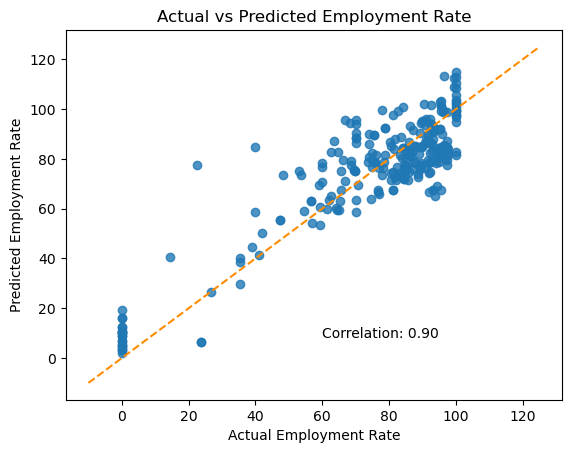

In [69]:
# Assuming 'result_df' is the DataFrame used for fitting the model
result_df['employment_rate_predict'] = modelOLS.predict(result_df)

# Plotting the actual values against predicted values
sns.regplot(x='employment_rate_ft_perm', y='employment_rate_predict', data=result_df, fit_reg=False)

# Plotting the diagonal line - if the prediction is correct x = y
line_coords = np.arange(result_df[['employment_rate_ft_perm', 'employment_rate_predict']].min().min() - 10,
                        result_df[['employment_rate_ft_perm', 'employment_rate_predict']].max().max() + 10)
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')

# Calculate the correlation coefficient
correlation_coefficient = result_df['employment_rate_ft_perm'].corr(result_df['employment_rate_predict'])

# Display the correlation coefficient on the plot
plt.text(result_df['employment_rate_ft_perm'].max() - 5,
         result_df['employment_rate_predict'].min() + 5,
         f'Correlation: {correlation_coefficient:.2f}',
         fontsize=10,
         verticalalignment='bottom',
         horizontalalignment='right')

plt.xlabel('Actual Employment Rate')
plt.ylabel('Predicted Employment Rate')
plt.title('Actual vs Predicted Employment Rate')
plt.show()

Most of the data points seem to be scattered and clustered around 60 to 100% and close to the regression line.
A few outliers around 0 as some of the independent variables have NaN data.

The is a 90% correlation coefficient which suggest that the prediction of the model are mostly accurate.

Residual Plot and distribution

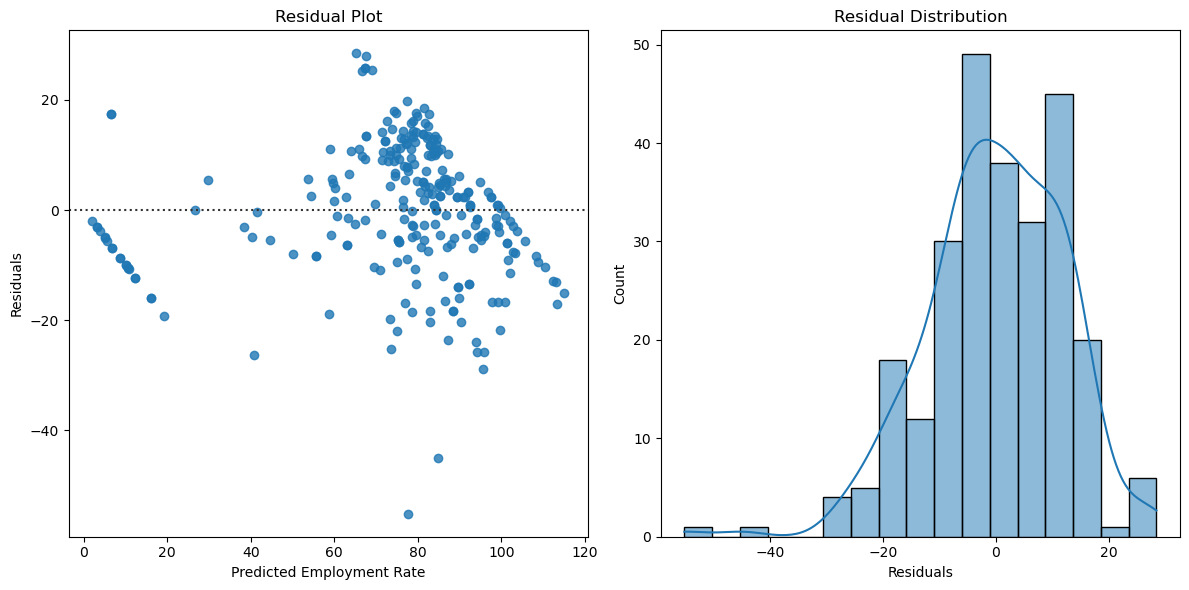

In [70]:
# Assuming 'result_df' is the DataFrame used for fitting the model
result_df['employment_rate_predict'] = modelOLS.predict(result_df)
result_df['residual'] = modelOLS.resid

# Displaying the residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.residplot(x='employment_rate_predict', y='residual', data=result_df)
plt.title('Residual Plot')
plt.xlabel('Predicted Employment Rate')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
# Distribution of residuals
sns.histplot(result_df['residual'], kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')

plt.tight_layout()
plt.show()

The Residual Plot show most data scattered around 60 to 100% where the data point above the 0 line is more closely clustered compared to the data points below the line where the data is more venly spread out.
Again there are outliers around the 0 line.

The residual distribution is good as its mostly follows a normal distribution, therefore statistical test carried out will be accurate.

Conclusion

In summary, the regression analysis revealed a good fit of the data, with a high R-squared value indicating the model's ability to explain the variation in the employment rate. 
The correlation between the actual and predicted employment rates is 90%, underlining the model's accuracy in capturing the underlying trends. This strong correlation suggests that the employed regression model is effective in making reliable predictions.